In [22]:
# ! pip install -q git+https://github.com/huggingface/transformers.git

In [23]:
# ! pip3 install numpy --pre torch torchvision torchaudio --force-reinstall --index-url https://download.pytorch.org/whl/nightly/cu118

In [24]:
# !pip install -q bitsandbytes==0.41.3 accelerate==0.25.0

In [17]:
from transformers import pipeline
from PIL import Image

## Load an image

Let's use the image that has been used for Llava demo

And ask the model to describe that image!

In [9]:
image_path = '/content/POKHARA.jpg'
image = Image.open(image_path)

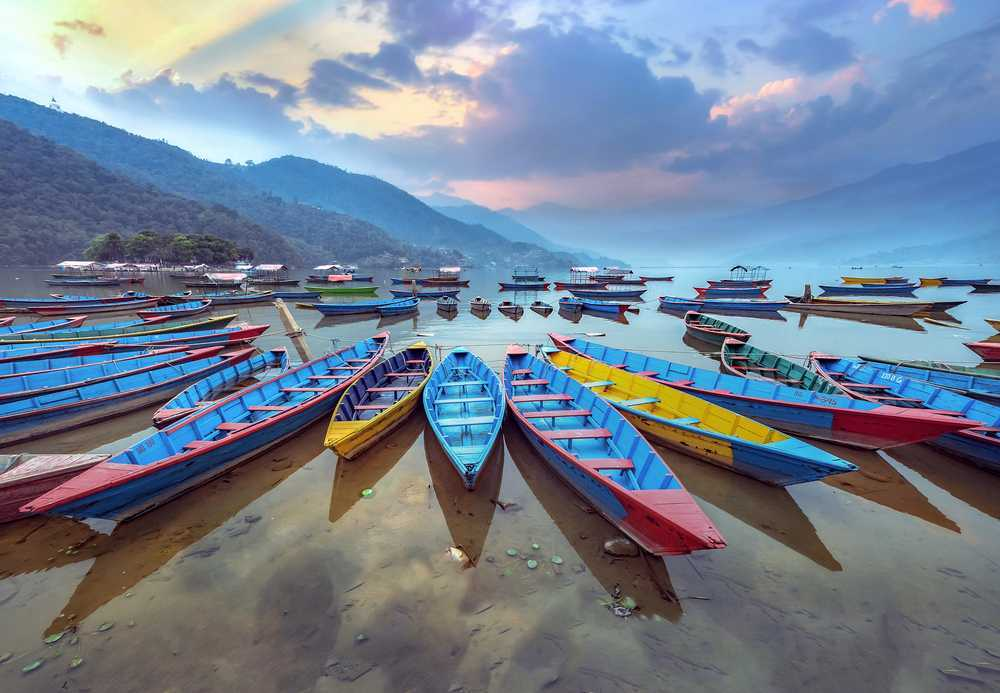

In [11]:
image

## Preparing the quantization config to load the model in 4bit precision

In order to load the model in 4-bit precision, we need to pass a `quantization_config` to our model. Let's do that in the cells below

In [2]:
import torch
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [3]:
print(torch.__version__)

2.2.0.dev20231208+cu118


## Load the model using `pipeline`

We will leverage the `image-to-text` pipeline from transformers !

In [4]:
from transformers import pipeline

model_id = "llava-hf/llava-1.5-7b-hf"

pipe = pipeline("image-to-text", model=model_id, model_kwargs={"quantization_config": quantization_config})

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/438 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

It is important to prompt the model wth a specific format, which is:
```bash
USER: <image>\n<prompt>\nASSISTANT:
```

In [14]:
max_new_tokens = 200
prompt = "USER: <image>\nCan you describe about this place?\nASSISTANT:"

outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

In [15]:
print(outputs[0]["generated_text"])

USER:  
Can you describe about this place?
ASSISTANT: The image features a serene body of water, likely a lake, with a large number of small boats floating on its surface. The boats are of various sizes and are scattered across the water, creating a picturesque scene. The boats are lined up in a way that suggests an organized arrangement. The overall atmosphere of the scene is calm and peaceful, with the boats providing a sense of tranquility.


In [18]:
full_description=outputs[0]["generated_text"]

In [21]:
assistant_description = full_description.split("?")[1].strip()
print(assistant_description)

ASSISTANT: The image features a serene body of water, likely a lake, with a large number of small boats floating on its surface. The boats are of various sizes and are scattered across the water, creating a picturesque scene. The boats are lined up in a way that suggests an organized arrangement. The overall atmosphere of the scene is calm and peaceful, with the boats providing a sense of tranquility.
